In [143]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Python version
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy as np
print('numpy: {}'.format(np.__version__))
import matplotlib.pyplot as plt 
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import pyspark
print('pyspark: {}'.format(pyspark.__version__))

Python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
scipy: 1.3.0
numpy: 1.16.4
pandas: 0.24.2
sklearn: 0.21.2
pyspark: 2.4.0


In [137]:
df = pd.read_csv("dataset.csv")

In [138]:
df.head()

,url,label
0,http://br-ofertasimperdiveis.epizy.com/produto...,1
1,https://semana-da-oferta.com/produtos.php?id=5...,1
2,https://scrid-apps-creacust-sslhide90766752024...,1
3,http://my-softbank-security.com/wap_login.htm,1
4,http://www.my-softbank-security.com/wap_login.htm,1


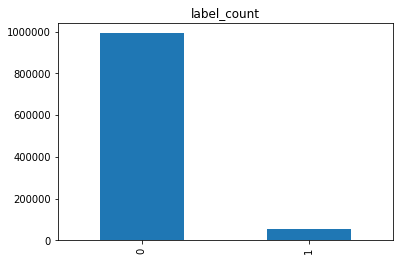

In [139]:
df.label.value_counts().plot(kind = 'bar',title = 'label_count')

In [253]:
url_length = []
for i in range(len(df.url2)):
    count = len(df['url2'][i])
    url_length.append(count)

In [254]:
df['url_length'] = url_length

In [255]:
df.head(10)

,label,url2,digitcount,url_length
0,1,http://br-ofertasimperdiveis.epizy.com/produto...,19,186
1,1,https://semana-da-oferta.com/produtos.php?id=5...,7,58
2,1,https://scrid-apps-creacust-sslhide90766752024...,11,72
3,1,http://my-softbank-security.com/wap_login.htm,0,45
4,1,http://www.my-softbank-security.com/wap_login.htm,0,49
5,1,http://diadesaldaolu.infomando.com,0,34
6,1,https://sites.google.com/site/helpsettingsreco...,4,59
7,1,http://protvinowifi.ru/,0,23
8,1,http://socset222.96.lt/,5,23
9,1,https://help78.000webhostapp.com/log.php,5,40


In [238]:
#test case

test_string = 'http://20748.xc.mieseng.com/xiaz/Ã¤Â½Â3Ã¨Æ’Â½Ã§Â§Â»Ã¥Å\xa0Â¨Ã¦â€°â€œÃ¥Â\x8dÂ°Ã¨Â½Â¯Ã¤Â»Â¶canonprintinkjet'
print(test_string)

aa = [int(i) for i in list(test_string) if i.isdigit()]
print(aa)
       
len(aa)

http://20748.xc.mieseng.com/xiaz/Ã¤Â½Â3Ã¨Æ’Â½Ã§Â§Â»Ã¥Å Â¨Ã¦â€°â€œÃ¥ÂÂ°Ã¨Â½Â¯Ã¤Â»Â¶canonprintinkjet
[2, 0, 7, 4, 8, 3]


6

In [146]:
len(df['url'])

1048572

In [178]:
df['url2'][0].isdigit()

False

In [243]:
digitcount = []
for i in range(len(df['url2'])):
    test_string = (df['url2'][i])
    res = [int(i) for i in list(test_string) if i.isdigit()] 
    digitcount.append(len(res))
    
print(digitcount)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [165]:
SUB = str.maketrans( "₀₁₂₃₄₅₆₇₈₉", "0123456789")
SUP =  str.maketrans( "⁰¹²³⁴⁵⁶⁷⁸⁹","0123456789")

In [166]:
url1 = []
for i in range(len(df['url'])):
    aa = df['url'][i].translate(SUB)
    url1.append(aa)

In [167]:
df['url1'] = url1

In [171]:
df.head()

,url,label,url1,url2
0,http://br-ofertasimperdiveis.epizy.com/produto...,1,http://br-ofertasimperdiveis.epizy.com/produto...,http://br-ofertasimperdiveis.epizy.com/produto...
1,https://semana-da-oferta.com/produtos.php?id=5...,1,https://semana-da-oferta.com/produtos.php?id=5...,https://semana-da-oferta.com/produtos.php?id=5...
2,https://scrid-apps-creacust-sslhide90766752024...,1,https://scrid-apps-creacust-sslhide90766752024...,https://scrid-apps-creacust-sslhide90766752024...
3,http://my-softbank-security.com/wap_login.htm,1,http://my-softbank-security.com/wap_login.htm,http://my-softbank-security.com/wap_login.htm
4,http://www.my-softbank-security.com/wap_login.htm,1,http://www.my-softbank-security.com/wap_login.htm,http://www.my-softbank-security.com/wap_login.htm


In [239]:
url2 = []
for i in range(len(df['url'])):
    aa = df['url1'][i].translate(SUP)
    url2.append(aa)

In [240]:
df['url2'] = url2

In [246]:
df['digitcount'] = digitcount

In [248]:
df.drop(['url','url1'],axis=1,inplace=True) #dropping the other two cols 

In [257]:
df.head(5)

,label,url2,digitcount,url_length
0,1,http://br-ofertasimperdiveis.epizy.com/produto...,19,186
1,1,https://semana-da-oferta.com/produtos.php?id=5...,7,58
2,1,https://scrid-apps-creacust-sslhide90766752024...,11,72
3,1,http://my-softbank-security.com/wap_login.htm,0,45
4,1,http://www.my-softbank-security.com/wap_login.htm,0,49


## The dataset has a high imbalanced data, hence using under-sampling to balance the data for model building 

In [241]:
df.columns

Index(['url', 'label', 'url1', 'url2'], dtype='object')

In [188]:
X = df.drop('label',axis=1)
y = df['label']

In [201]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0],X[y==l, 1], c=c, label=l, marker=m )
    plt.title(label)
    plt.legend(loc='best')
    plt.show()

In [189]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(return_indices=True)

In [192]:
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

In [193]:
print('Removed indexes:', id_rus)

Removed indexes: [ 974010 1010523   62643 ...   56934   56935   56936]


In [213]:
print(X_rus.shape,y_rus.shape)

(113874, 1) (113874,)


In [312]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')  # make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-') # make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.') # make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens)) #remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com') #removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [271]:
tokens = []
for i in range(len(df['url2'])):
    tokens.append(makeTokens(df['url2'][i]))

In [318]:
aa = df['url2'][4]
print(aa)
if 'www.' in aa:
    new  = aa.split('www.')
    print(new)
else:
    print(aa)

http://www.my-softbank-security.com/wap_login.htm
['http://', 'my-softbank-security.com/wap_login.htm']


In [311]:
pd.DataFrame(tokens)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,,ofertasimperdiveis.epizy.com,tela,epizy,b'http:,8mp,te,m8,produto,espacial,...,None,None,None,None,None,None,None,None,None,None
1,,produtos.php?id=5abad0c01d149',da,semana,oferta,oferta.com,php?id=5abad0c01d149',b'https:,produtos,None,...,None,None,None,None,None,None,None,None,None,None
2,,squi.com,creacust,sslhide90766752024.cread,sslhide90766752024,cread,scrid,squi,apps,hider_reo,...,None,None,None,None,None,None,None,None,None,None
3,,wap_login.htm',security,security.com,softbank,wap_login,my,htm',b'http:,None,...,None,None,None,None,None,None,None,None,None,None
4,,www,wap_login.htm',www.my,security,security.com,softbank,wap_login,my,htm',...,None,None,None,None,None,None,None,None,None,None
5,,com',infomando,diadesaldaolu,diadesaldaolu.infomando.com',b'http:,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,,sites.google.com,google,b'https:,site,sites,',helpsettingsrecoveryfbus2018,None,None,...,None,None,None,None,None,None,None,None,None,None
7,,protvinowifi,ru,protvinowifi.ru,',b'http:,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,,socset222.96.lt,lt,96,socset222,',b'http:,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,,log.php',help78.000webhostapp.com,help78,b'https:,php',000webhostapp,log,None,None,...,None,None,None,None,None,None,None,None,None,None
